# Binary regression

1. Dataset ‘Doctor.xlsx’ (variables Y=pregnancy outcome (dependent variable), x1, x2, x3, x4, x5 (independent variables, factors)=indicators of the woman under study):

- Construct descriptive statistics using the summary function.

- If necessary, create a categorical variable (factor function).

- Build a basic logistic regression model with as many predictors as possible using the glm function. 

- Write a binary regression equation using coefficient estimates.
  - $ln\left(\frac{p(y=1)}{1-p(y=1)}\right) = -10.70095 + 0.45959*x_1 + 0.81826*x_2 - 0.37897*x_3 - 2.14618*x_{42} + 0.22639*x_{43} - 0.03383*x_5$

- Test the significance of the regression coefficients individually. : Intercept and x1

- Test the significance of the regression as a whole using the Wald and maximum likelihood criteria. 

- Construct confidence intervals for the regression coefficients (confint and confint.default functions).

---------------------------------------------------------------------

- Conduct comparative analyses of logit and probit models.

- Construct a contingency table with a threshold probability of 0.5 (confusionMatrix function).

- Calculate the specificity and sensitivity of the model (sensitivity and specificity functions).

- Find the optimal threshold value of the prediction probability. Build a contingency table for this probability, calculate the specificity and sensitivity of the model (function optimalCutoff).

- If the sample is large, you can preliminarily split the sample into two parts: training and test samples (function sample_frac).

- Plot the ROC curve, interpret the results (plotROC function). 

- Try to improve the logit or probit model using the AIC coefficient (stepAIC function).

In [15]:
library(readxl)
library(dplyr)

read_excel('../data/Doctor.xlsx',) -> doctors
glimpse(doctors)    

doctors = mutate(doctors,
                    y = factor(y, labels = c ("No", "Yes")),
                    x4 = factor(x4) # если бы мы знали что это такое мы не знаем что это такое
)

glimpse(doctors)
summary(doctors)


Rows: 58
Columns: 6
$ y  <dbl> 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1…
$ x1 <dbl> 14, 12, 14, 11, 21, 12, 17, 12, 14, 19, 14, 16, 17, 15, 18, 22, 19,…
$ x2 <dbl> 4.30, 11.54, 5.84, 14.70, 5.10, 6.14, 5.05, 11.30, 3.30, 6.60, 7.60…
$ x3 <dbl> 1.00, 8.49, 2.47, 6.60, 3.48, 3.09, 1.14, 8.85, 1.20, 4.30, 3.98, 7…
$ x4 <dbl> 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 2…
$ x5 <dbl> 3.72, 40.28, 56.00, 57.41, 83.00, 62.57, 22.16, 12.00, 110.00, 2.96…
Rows: 58
Columns: 6
$ y  <fct> No, No, No, Yes, No, No, Yes, Yes, No, Yes, Yes, Yes, Yes, No, Yes,…
$ x1 <dbl> 14, 12, 14, 11, 21, 12, 17, 12, 14, 19, 14, 16, 17, 15, 18, 22, 19,…
$ x2 <dbl> 4.30, 11.54, 5.84, 14.70, 5.10, 6.14, 5.05, 11.30, 3.30, 6.60, 7.60…
$ x3 <dbl> 1.00, 8.49, 2.47, 6.60, 3.48, 3.09, 1.14, 8.85, 1.20, 4.30, 3.98, 7…
$ x4 <fct> 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 2…
$ x5 <dbl> 3.72, 40.28, 56.00, 57.41, 83.00, 62.57, 22.16, 12.00, 110.00, 2.96…


   y            x1              x2               x3         x4    
 No :21   Min.   :11.00   Min.   : 3.300   Min.   : 1.000   1:18  
 Yes:37   1st Qu.:14.00   1st Qu.: 6.375   1st Qu.: 3.985   2: 2  
          Median :16.00   Median :10.450   Median : 6.835   3:38  
          Mean   :16.33   Mean   :10.328   Mean   : 7.141         
          3rd Qu.:19.00   3rd Qu.:13.400   3rd Qu.: 9.975         
          Max.   :27.00   Max.   :19.000   Max.   :16.000         
       x5        
 Min.   :  0.80  
 1st Qu.: 22.11  
 Median : 38.94  
 Mean   : 45.13  
 3rd Qu.: 53.12  
 Max.   :399.80  

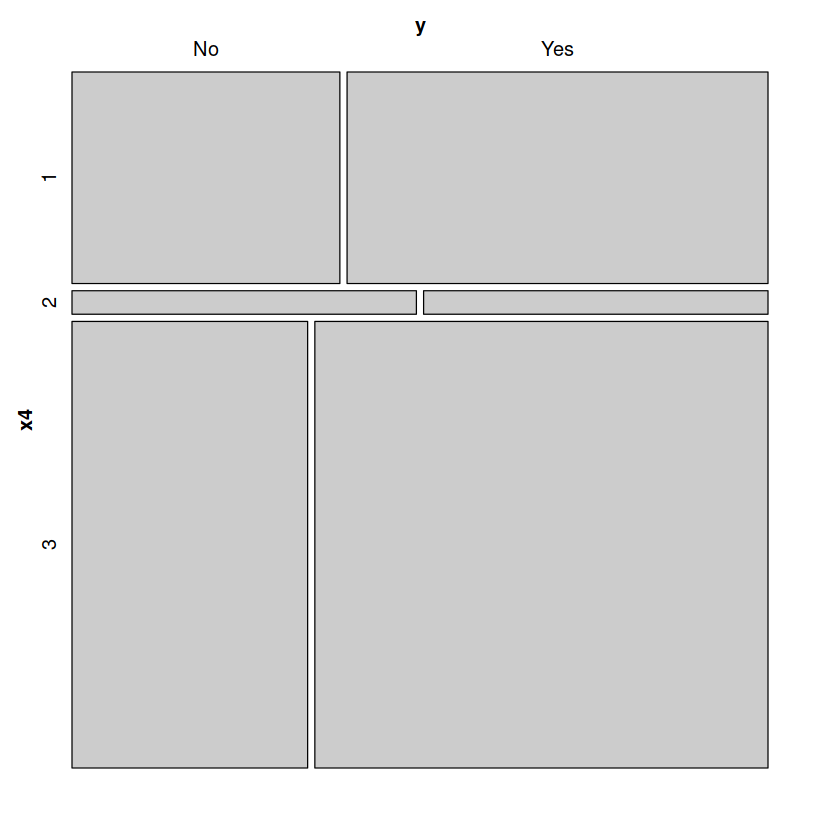

In [16]:
library(vcd)

mosaic(~ y | x4, data=doctors )

## Build models logist and probit

In [17]:
fit1 = glm(y ~ ., data = doctors, family = binomial(logit))
summary(fit1)


Call:
glm(formula = y ~ ., family = binomial(logit), data = doctors)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -10.70095    3.69973  -2.892  0.00382 **
x1            0.45959    0.17705   2.596  0.00944 **
x2            0.81826    0.43646   1.875  0.06083 . 
x3           -0.37897    0.42125  -0.900  0.36832   
x42          -2.14618    4.14447  -0.518  0.60457   
x43           0.22639    0.84413   0.268  0.78855   
x5           -0.03383    0.02045  -1.654  0.09816 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.934  on 57  degrees of freedom
Residual deviance: 39.251  on 51  degrees of freedom
AIC: 53.251

Number of Fisher Scoring iterations: 6


In [70]:
library(MASS)
# Apply stepAIC for the logistic model
optimized_logit <- stepAIC(fit1, direction = "both", trace = TRUE)
summary(optimized_logit)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=53.25
y ~ x1 + x2 + x3 + x4 + x5

       Df Deviance    AIC
- x4    2   39.737 49.737
- x3    1   40.236 52.236
<none>      39.251 53.251
- x2    1   45.363 57.363
- x5    1   47.802 59.802
- x1    1   48.955 60.955

Step:  AIC=49.74
y ~ x1 + x2 + x3 + x5

       Df Deviance    AIC
- x3    1   40.618 48.618
<none>      39.737 49.737
+ x4    2   39.251 53.251
- x2    1   45.824 53.824
- x5    1   47.946 55.946
- x1    1   49.205 57.205

Step:  AIC=48.62
y ~ x1 + x2 + x5

       Df Deviance    AIC
<none>      40.618 48.618
+ x3    1   39.737 49.737
+ x4    2   40.236 52.236
- x5    1   48.250 54.250
- x1    1   49.294 55.294
- x2    1   60.197 66.197



Call:
glm(formula = y ~ x1 + x2 + x5, family = binomial(logit), data = doctors)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.07857    2.97845  -3.048 0.002303 ** 
x1           0.40292    0.15730   2.562 0.010420 *  
x2           0.47596    0.13924   3.418 0.000631 ***
x5          -0.02954    0.01895  -1.559 0.119037    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.934  on 57  degrees of freedom
Residual deviance: 40.618  on 54  degrees of freedom
AIC: 48.618

Number of Fisher Scoring iterations: 6


In [18]:
fit2 = glm(y ~ ., data = doctors, family = binomial(probit))
summary(fit2)


Call:
glm(formula = y ~ ., family = binomial(probit), data = doctors)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -6.12853    1.94100  -3.157  0.00159 **
x1           0.26397    0.09484   2.783  0.00538 **
x2           0.47466    0.23534   2.017  0.04370 * 
x3          -0.23146    0.23321  -0.992  0.32096   
x42         -1.23190    1.93357  -0.637  0.52405   
x43          0.09670    0.47985   0.202  0.84029   
x5          -0.01906    0.01125  -1.695  0.09014 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.934  on 57  degrees of freedom
Residual deviance: 39.239  on 51  degrees of freedom
AIC: 53.239

Number of Fisher Scoring iterations: 7


In [71]:
library(MASS)
# Apply stepAIC for the logistic model
optimized_logit <- stepAIC(fit1, direction = "both", trace = TRUE)
summary(optimized_logit)

Start:  AIC=53.25
y ~ x1 + x2 + x3 + x4 + x5

       Df Deviance    AIC
- x4    2   39.737 49.737
- x3    1   40.236 52.236
<none>      39.251 53.251
- x2    1   45.363 57.363
- x5    1   47.802 59.802
- x1    1   48.955 60.955

Step:  AIC=49.74
y ~ x1 + x2 + x3 + x5

       Df Deviance    AIC
- x3    1   40.618 48.618
<none>      39.737 49.737
+ x4    2   39.251 53.251
- x2    1   45.824 53.824
- x5    1   47.946 55.946
- x1    1   49.205 57.205

Step:  AIC=48.62
y ~ x1 + x2 + x5

       Df Deviance    AIC
<none>      40.618 48.618
+ x3    1   39.737 49.737
+ x4    2   40.236 52.236
- x5    1   48.250 54.250
- x1    1   49.294 55.294
- x2    1   60.197 66.197



Call:
glm(formula = y ~ x1 + x2 + x5, family = binomial(logit), data = doctors)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.07857    2.97845  -3.048 0.002303 ** 
x1           0.40292    0.15730   2.562 0.010420 *  
x2           0.47596    0.13924   3.418 0.000631 ***
x5          -0.02954    0.01895  -1.559 0.119037    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.934  on 57  degrees of freedom
Residual deviance: 40.618  on 54  degrees of freedom
AIC: 48.618

Number of Fisher Scoring iterations: 6


### Significance of the models
Нулевая гипотеза (H₀): Все коэффициенты, указанные в Terms, равны нулю.

Альтернативная гипотеза (H₁): Хотя бы один из коэффициентов указанных в Terms, отличается от нуля.


In [19]:

library(aod)
wald.test(b=coef(fit1),Sigma = vcov(fit1),Terms = 1:6)

wald.test(b=coef(fit2),Sigma = vcov(fit2),Terms = 1:6)


Wald test:
----------

Chi-squared test:
X2 = 13.5, df = 6, P(> X2) = 0.036

Wald test:
----------

Chi-squared test:
X2 = 17.2, df = 6, P(> X2) = 0.0087

### Conf intervals for the coef for both models

In [20]:
confint(fit1)
confint.default(fit1)

confint(fit2)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-19.50621113,-4.630054171
x1,0.15462038,0.868430365
x2,0.14108761,1.949630035
x3,-1.41817185,0.319468193
x42,-9.44403808,3.640104684
x43,-1.45888350,1.927761096
x5,-0.07910068,-0.006760787


,2.5 %,97.5 %
(Intercept),-17.95229371,-3.449603671
x1,0.11257920,0.806603338
x2,-0.03719091,1.673716157
x3,-1.20459774,0.446664628
x42,-10.26918747,5.976819488
x43,-1.42807112,1.880841385
x5,-0.07391230,0.006261571


Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,2.5 %,97.5 %
(Intercept),-10.73534556,-2.72812634
x1,0.08933261,0.48167630
x2,0.08204442,1.09812018
x3,-0.82195558,0.16886383
x42,-5.21866608,2.11117675
x43,-0.86433881,1.04811885
x5,-0.04227570,-0.00386976


### Chech multicoliniarity of the models

In [21]:
library(car)
vif(fit1)
vif(fit2)

,GVIF,Df,GVIF^(1/(2*Df))
x1,1.561305,1,1.249522
x2,10.581651,1,3.252945
x3,9.815211,1,3.132924
x4,1.055348,2,1.013559
x5,1.215626,1,1.102554


,GVIF,Df,GVIF^(1/(2*Df))
x1,1.437401,1,1.198916
x2,10.610650,1,3.257399
x3,10.191322,1,3.192385
x4,1.068268,2,1.016647
x5,1.165978,1,1.079805


### Find “optimalCutoff” for both models

### Confusion matrixes

#### optimal cutoff

In [48]:
library(pROC)


# предсказания делим на да и нет 
predictedProbability <- plogis(predict(fit1, newdata = doctors)) 


# Создаем ROC-кривую на основе вероятностей предсказаний и истинных значений
roc_curve <- roc(doctors$y, predictedProbability)

# Вычисляем оптимальный порог для классификации
opt_cutoff <- coords(roc_curve, "best", ret = "threshold")
print(opt_cutoff)

predictedClassOpt = factor(ifelse(predictedProbability >= 0.54, "Yes", "No"))


Setting levels: control = No, case = Yes

Setting direction: controls < cases



  threshold
1 0.5463586


In [49]:
library(caret)

# предсказания делим на да и нет 
predictedProbability <- plogis(predict(fit1, newdata = doctors)) 
predictedClass = factor(ifelse(predictedProbability >= 0.5, "Yes", "No"))

predicted_fit1 = data.frame(
    predictedProbability,
    predictedClass
) #. это предыдущий шаг

confusionMatrix(predicted_fit1$predictedClass, doctors$y)


predicted_fit11 = data.frame(
    predictedProbability,
    predictedClassOpt
) #. это предыдущий шаг


confusionMatrix(predicted_fit11$predictedClass, doctors$y)


Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  16   3
       Yes  5  34
                                          
               Accuracy : 0.8621          
                 95% CI : (0.7462, 0.9385)
    No Information Rate : 0.6379          
    P-Value [Acc > NIR] : 0.0001331       
                                          
                  Kappa : 0.6951          
                                          
 Mcnemar's Test P-Value : 0.7236736       
                                          
            Sensitivity : 0.7619          
            Specificity : 0.9189          
         Pos Pred Value : 0.8421          
         Neg Pred Value : 0.8718          
             Prevalence : 0.3621          
         Detection Rate : 0.2759          
   Detection Prevalence : 0.3276          
      Balanced Accuracy : 0.8404          
                                          
       'Positive' Class : No              
                                 

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  18   3
       Yes  3  34
                                          
               Accuracy : 0.8966          
                 95% CI : (0.7883, 0.9611)
    No Information Rate : 0.6379          
    P-Value [Acc > NIR] : 7.951e-06       
                                          
                  Kappa : 0.7761          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.9189          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.9189          
             Prevalence : 0.3621          
         Detection Rate : 0.3103          
   Detection Prevalence : 0.3621          
      Balanced Accuracy : 0.8880          
                                          
       'Positive' Class : No              
                                 

In [59]:
# предсказания делим на да и нет 
predicted_fit2 <- plogis(predict(fit2, newdata = doctors)) %>%
data.frame(
    
    predictedProbability = .,
    predictedClass = factor(ifelse(. >= 0.5, "Yes", "No"))
) #. это предыдущий шаг

confusionMatrix(predicted_fit2$predictedClass, doctors$y)

predicted_fit22 = data.frame(
    predictedProbability,
    predictedClassOpt
) #. это предыдущий шаг


confusionMatrix(predicted_fit22$predictedClass, doctors$y)






Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  17   3
       Yes  4  34
                                         
               Accuracy : 0.8793         
                 95% CI : (0.767, 0.9501)
    No Information Rate : 0.6379         
    P-Value [Acc > NIR] : 3.506e-05      
                                         
                  Kappa : 0.736          
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.8095         
            Specificity : 0.9189         
         Pos Pred Value : 0.8500         
         Neg Pred Value : 0.8947         
             Prevalence : 0.3621         
         Detection Rate : 0.2931         
   Detection Prevalence : 0.3448         
      Balanced Accuracy : 0.8642         
                                         
       'Positive' Class : No             
                                         

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  18   3
       Yes  3  34
                                          
               Accuracy : 0.8966          
                 95% CI : (0.7883, 0.9611)
    No Information Rate : 0.6379          
    P-Value [Acc > NIR] : 7.951e-06       
                                          
                  Kappa : 0.7761          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8571          
            Specificity : 0.9189          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.9189          
             Prevalence : 0.3621          
         Detection Rate : 0.3103          
   Detection Prevalence : 0.3621          
      Balanced Accuracy : 0.8880          
                                          
       'Positive' Class : No              
                                 

Setting levels: control = No, case = Yes

Setting direction: controls < cases



[1] "Площадь под ROC-кривой (AUC): 0.927927927927928"


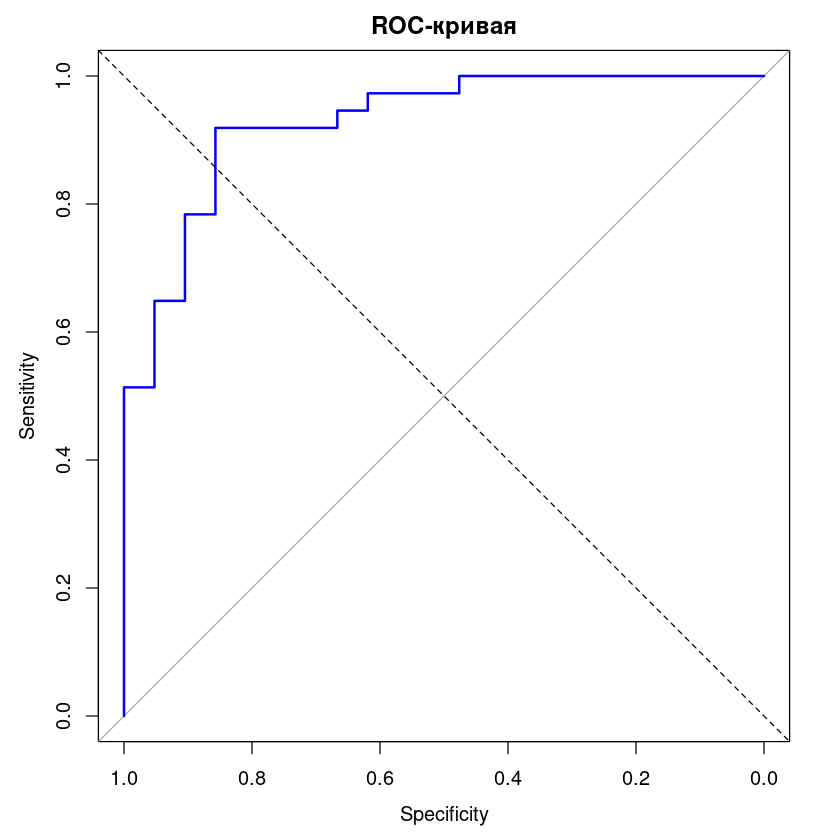

In [58]:
# Построение объекта ROC-кривой
roc_curve <- roc(doctors$y, predicted_fit2$predictedProbability)

# Вычисление площади под ROC-кривой (AUC)
auc_value <- auc(roc_curve)
print(paste("Площадь под ROC-кривой (AUC):", auc_value))

# Построение ROC-кривой
plot(roc_curve, col = "blue", main = "ROC-кривая")
abline(a = 0, b = 1, lty = 2) # Диагональ случайной классификации

In [61]:
# Построение объекта ROC-кривой
roc_curve <- roc(doctors$y, predicted_fit1$predictedProbability)

# Вычисление площади под ROC-кривой (AUC)
auc_value <- auc(roc_curve)
print(paste("Площадь под ROC-кривой (AUC):", auc_value))


Setting levels: control = No, case = Yes

Setting direction: controls < cases



[1] "Площадь под ROC-кривой (AUC): 0.927927927927928"


In [62]:
install.packages("caTools")
library(caTools)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [66]:
# Вычисление AUC с использованием colAUC
auc_value <- colAUC(predicted_fit22$predictedProbability, doctors$y, plotROC = FALSE)

print(paste("AUC:", auc_value))

[1] "AUC: 0.927927927927928"


In [67]:
identical(predicted_fit2$predictedProbability, predicted_fit1$predictedProbability)


[1] FALSE

In [68]:
# Функция для ручного вычисления AUC
compute_auc <- function(true_labels, predicted_probs) {
  # Создание таблицы с истинными метками и предсказанными вероятностями
  data <- data.frame(True = true_labels, Predicted = predicted_probs)
  
  # Сортировка данных по убыванию вероятностей
  data <- data[order(-data$Predicted), ]
  
  # Подсчет количества положительных и отрицательных классов
  n_pos <- sum(data$True == "Yes")
  n_neg <- sum(data$True == "No")
  
  # Инициализация переменных для вычисления
  tpr <- cumsum(data$True == "Yes") / n_pos # True Positive Rate
  fpr <- cumsum(data$True == "No") / n_neg  # False Positive Rate
  
  # Вычисление площади под ROC-кривой методом трапеций
  auc <- sum((fpr[-1] - fpr[-length(fpr)]) * (tpr[-1] + tpr[-length(tpr)]) / 2)
  return(auc)
}

# Вычисление AUC для первой модели
auc_model1 <- compute_auc(doctors$y, predicted_fit1$predictedProbability)
print(paste("AUC для модель 1:", auc_model1))

# Вычисление AUC для второй модели
auc_model2 <- compute_auc(doctors$y, predicted_fit2$predictedProbability)
print(paste("AUC для модель 2:", auc_model2))


[1] "AUC для модель 1: 0.927927927927928"
[1] "AUC для модель 2: 0.927927927927928"
